In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [3]:
models = [
    "RoBERTa (default)", "RoBERTa (3-fold + fine-tuning)", "RoBERTa + Extra Features",
    "SVM (Linear Kernel)", "SVM (RBF Kernel)", "XLNet"
]

In [4]:
accuracy = [52.6, 65.2, 62.3, 63.0, 61.6, 60.9]
precision = [66.15, 72.8, 67.4, 80, 86, 61.19]
recall = [50.59, 69.4, 75.3, 53, 45, 59.42]
f1_scores = [57.33, 71.1, 71.1, 64.47, 59.0, 60.29]
print(len(accuracy))
print(len(precision))
print(len(recall))
print(len(f1_scores))

6
6
6
6


In [5]:
df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_scores
})

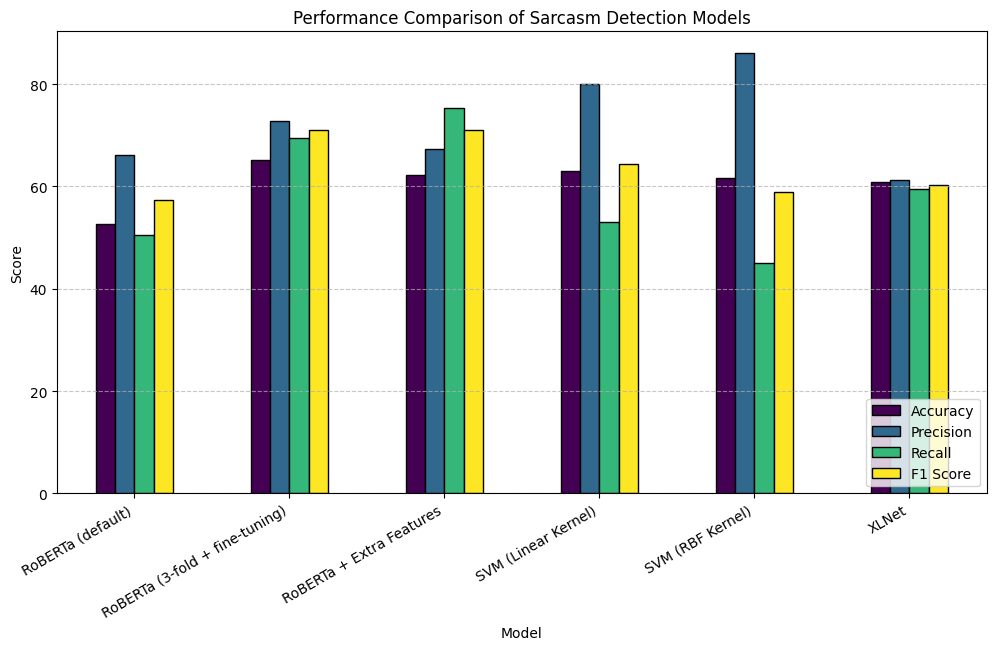

In [14]:
df.set_index("Model").plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title("Performance Comparison of Sarcasm Detection Models")
plt.ylabel("Score")
plt.xticks(rotation=30, ha='right')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


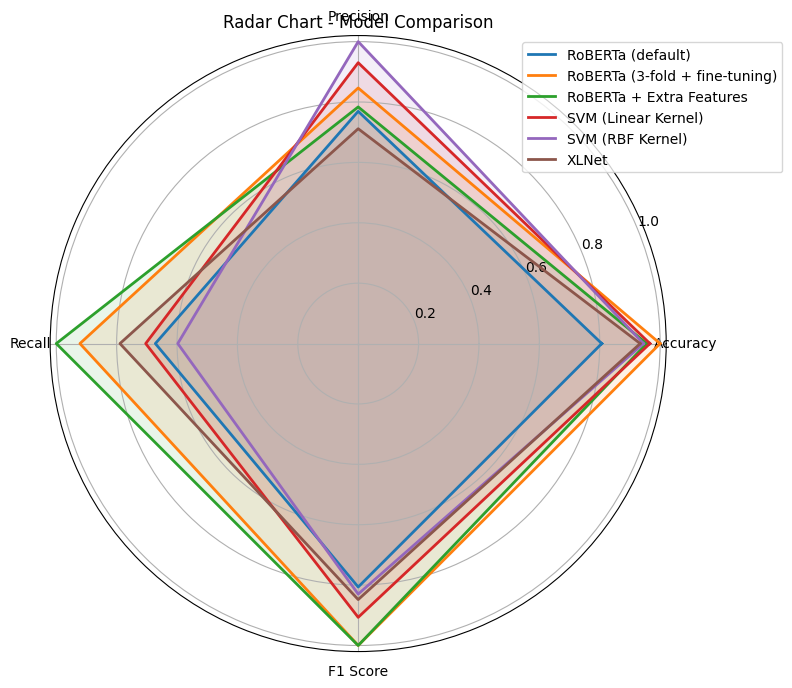

In [15]:
from math import pi

# Normalize values for better visualization
normalized_metrics = df.set_index("Model") / df.set_index("Model").max()

# Define categories
categories = list(df.columns[1:])
num_vars = len(categories)

# Create a radar chart for each model
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Close the circular plot

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, model in enumerate(models):
    values = normalized_metrics.iloc[i].tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=model, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart - Model Comparison")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


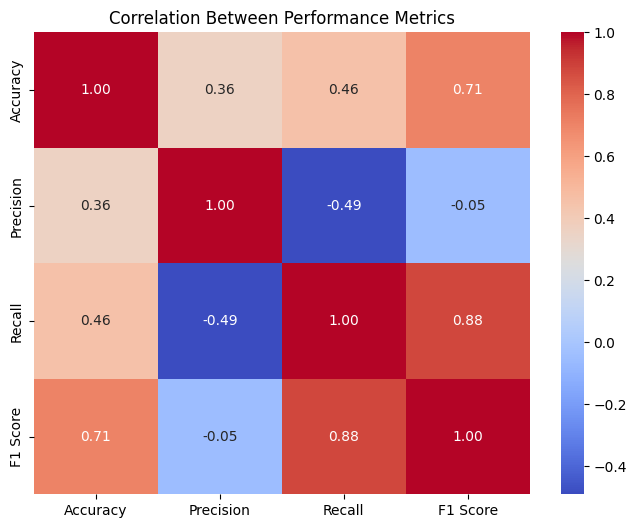

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.set_index("Model").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Performance Metrics")
plt.show()


In [18]:
import plotly.express as px

fig = px.line_polar(df.melt(id_vars=["Model"], var_name="Metric", value_name="Score"),
                    r="Score", theta="Metric", color="Model", line_close=True)
fig.update_layout(title="Radar Chart - Model Performance", template="plotly_dark")
fig.show()
